## SC3251 - Module 1
**Name:** Hussary, Elias   
**Assignment:** SC3251 - Module 1  
**Date:** 2018-05-23

---

In [2]:
%config IPCompleter.greedy=True # for better intellisense

## Import necessary modules for this notebook.
from matplotlib import pyplot as plt, rcParams
import pandas as pd
import numpy as np
from util import list_to_html_table

rcParams.update({'font.size': 16, 'figure.figsize': (20,10)}) # global formatting

#### Step 1 - Plot the Data
Create side-by-side boxplots for the number of mosquitos in
each group (beer vs water)

Text(0.5,0,'Treatment Type')

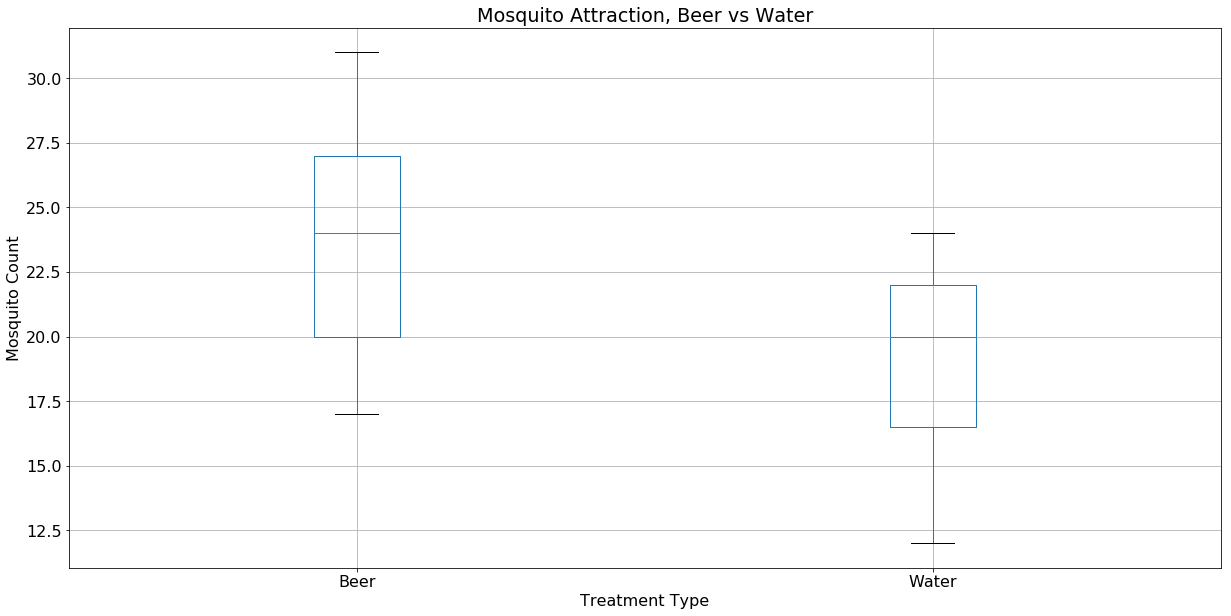

In [3]:
# load and plot the data
mosquitos_data = pd.read_csv('./mosquitos_data.csv')
mosquitos_data.boxplot(by='Treatment')

# chart formatting
plt.title('Mosquito Attraction, Beer vs Water')
plt.suptitle('')
plt.ylabel('Mosquito Count')
plt.xlabel('Treatment Type')

#### Step 2 - Analyze the Plot
**_What does the graph reveal about the data for both groups?_**  
The graph suggests that Mosquitos are more attracted to people who consume Beer compared to those who drink Water.

**_Is there an association between beer consumption and attractiveness to mosquitos?_**  
Yes, it appears that there is an association between Beer and the attractiveness to mosquitos.

#### Step 3 - Calculate the Statistics

Calculate basic statistics measures for each group: 
- the mean, 
- median, and 
- standard deviation.

In [4]:
# filter to smaller sample sizes.
beer_sample = mosquitos_data[mosquitos_data.Treatment == 'Beer']['Response']
water_sample = mosquitos_data[mosquitos_data.Treatment == 'Water']['Response']

In [5]:
# calc stats
list_to_html_table([
        ['<b>Stat</b>', '<b>Beer</b>', '<b>Water</b>', '<b>Diff</b>'],
        ['Mean', beer_sample.mean(), water_sample.mean(), beer_sample.mean() - water_sample.mean()],
        ['Median', beer_sample.median(), water_sample.median(), beer_sample.median() - water_sample.median()],
        ['STD', beer_sample.std(),water_sample.std(), beer_sample.std() - water_sample.std()],
])

Stat,Beer,Water,Diff
Mean,23.6,19.22222222222222,4.37777777777778
Median,24.0,20.0,4.0
STD,4.133198922545748,3.6711202899124045,0.4620786326333439


_**Explain the numbers**_  

_Mean:_ On average, beer drinkers attracted _4.38_ more mosquitos than non-beer drinkers.

_Median:_ The median value for both treatment samples are aligned with the mean, this also suggests that beer drinkers attract roughly _4_ more mosquitos than non-beer drinkers.  

_STD:_ The standard deviation for both samples are almost equal. This indicates both treatment samples are reliable for comparison.

#### Bonus - Data Simulation

Write the code to implement the data simulation demonstrated in this video; ["Statistics Without the Agonizing Pain"](https://youtu.be/5Dnw46eC-0o).

In [6]:
# iteration variables
sample_size = 8
max_iter = 55000
diff_list = []

# do the loop
while len(diff_list) < max_iter:
    
    # take random subset sample, frac=1 randomizes
    data_subset = pd.concat([beer_sample.sample(sample_size), 
                            water_sample.sample(sample_size)]).sample(frac=1)
    
    a_subset = data_subset.iloc[:8]
    b_subset = data_subset.iloc[8:]
    
    # calc diff and push it to list
    diff = round(a_subset.mean() - b_subset.mean(),1)
    diff_list.append(diff)
    

Count by unique occurrences.

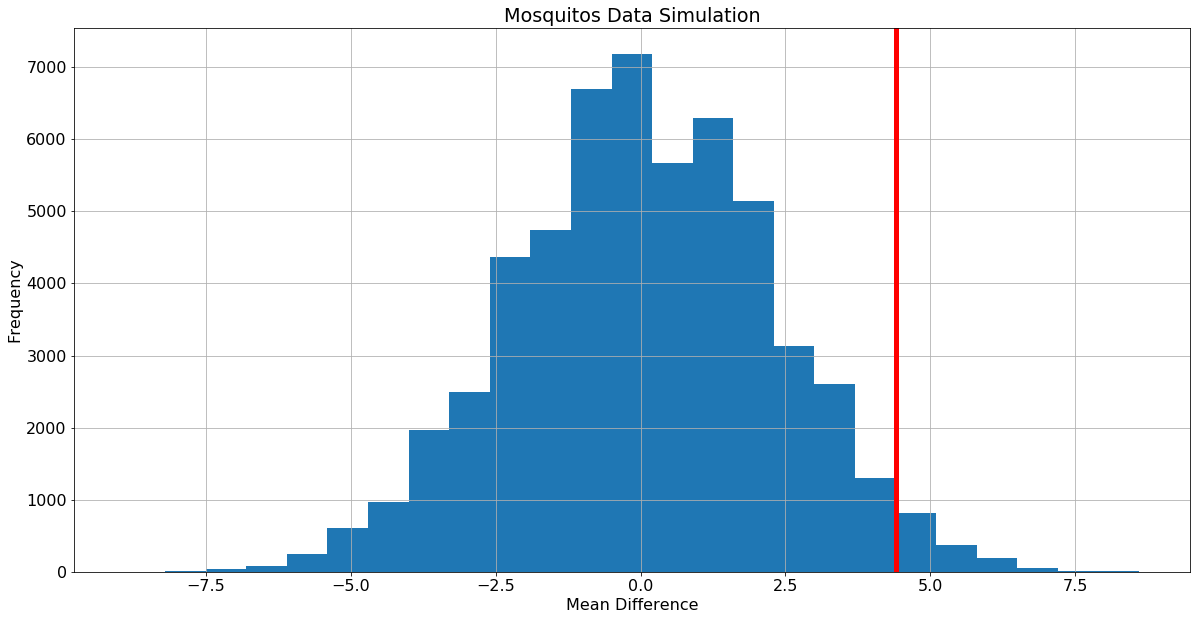

In [7]:
diff_df = pd.DataFrame({'diff':diff_list})
diff_df.plot.hist(bins=25, legend=False, grid=True)
plt.title('Mosquitos Data Simulation')
plt.suptitle('')
plt.xlabel('Mean Difference')
plt.axvline(x=4.4, color='r', linewidth=5)